In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 37.2 MB/s eta 0:

In [3]:
from pycaret.time_series import TSForecastingExperiment
import pandas as pd
from google.colab import files
import io

In [39]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["yahoo_stock.csv"]))
data["index"] = pd.to_datetime(data["Date"]  + " 00:00:00")
data.drop(columns=["Date"], inplace=True)
data.set_index("index", inplace = True)
data.head()

Saving yahoo_stock.csv to yahoo_stock.csv


,High,Low,Open,Close,Volume,Adj Close
index,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [40]:
exp = TSForecastingExperiment()
exp.setup(data, fh = 3, session_id = 123, use_gpu = True, target = "Close")

,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1825, 6)"
5,Transformed data shape,"(1825, 6)"
6,Transformed train set shape,"(1822, 6)"
7,Transformed test set shape,"(3, 6)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [41]:
best = exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.3000
auto_arima,Auto ARIMA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,31.7300
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.5643,0.3844,29.4280,31.3111,0.0083,0.0083,-12.2189,0.2100
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.5649,0.3851,29.4630,31.3720,0.0083,0.0083,-12.2985,0.2000
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.5649,0.3851,29.4631,31.3721,0.0083,0.0083,-12.2985,0.2100
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.5667,0.3872,29.5537,31.5407,0.0083,0.0084,-12.4446,0.2433
naive,Naive Forecaster,0.5673,0.4041,29.6822,33.0474,0.0083,0.0083,-5.8073,0.0567
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.5706,0.4053,29.8940,33.1931,0.0084,0.0084,-4.6288,0.7600
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6063,0.4341,31.7735,35.5671,0.0089,0.0089,-5.9230,0.4833
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6328,0.4339,33.0513,35.4083,0.0093,0.0093,-9.6855,1.0367


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:711: UserWarning:

Unsupported estimator `ensemble_forecaster` for method `compare_models()`, removing from model_library



In [42]:
exp.plot_model(best)

/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_base.py:555: UserWarning:

Until 0.23.0, the predict_quantiles legacy_interface argument can be used for facilitating deprecation and change to the new predict_quantiles interface. It will be removed in 0.23.0, from when passing the legacy_interface argument will raise an exception.



In [43]:
train_holdout = exp.predict_model(best)
train_holdout

/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_base.py:555: UserWarning:

Until 0.23.0, the predict_quantiles legacy_interface argument can be used for facilitating deprecation and change to the new predict_quantiles interface. It will be removed in 0.23.0, from when passing the legacy_interface argument will raise an exception.



,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


,y_pred
2020-11-18,3567.7900
2020-11-19,3581.8701
2020-11-20,3557.5400


/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_base.py:555: UserWarning:

Until 0.23.0, the predict_quantiles legacy_interface argument can be used for facilitating deprecation and change to the new predict_quantiles interface. It will be removed in 0.23.0, from when passing the legacy_interface argument will raise an exception.



,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


<Axes: >

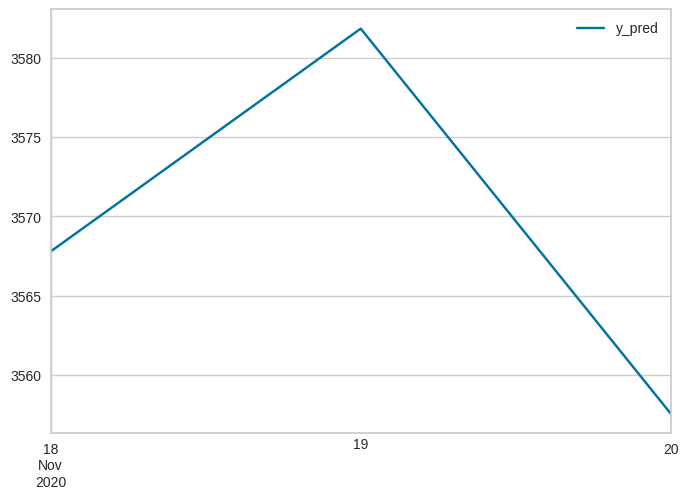

In [47]:
predictions = exp.predict_model(best, fh = 3)
predictions.plot()